# Photosynthetic pigment extractions

In [107]:
# Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as ss

# Figures and plot settings
plt.rcParams['figure.figsize'] = [50, 30]
plt.rcParams['figure.dpi'] = 600
kwargs = {'linestyle':':', 'c':'g', 'lw':3}
kwargs2 = {'linestyle':'-', 'c':'r', 'lw':3}

%matplotlib inline

## Paine protocol for Red algae pigment extraction
Pigment extraction and spectrophotometry of phycobilins; phycoerythrin (PE) and phycocyanin (PC).
- $ Phycoerythin \ (mg/ml)=((A_{564} - A_{592}) – (A_{455} - A_{592}) \ 0.20) * 0.12 $
- $ Phycocyanin \ (mg/ml) = ((A_{618} - A_{645}) – (A_{592} - A_{645}) 0.51) * 0.15 $
- $ Chlorophyll\ (mg/ml) = (13.7 x A_{665}) - (5.76 x A_{649}) $

Plotting the whole Absorbance spectra to visualize how the formula works. Notice PE in magenta and PC in 

### Prepare output dataframes

In [108]:
# Prepare sample dataframe
col_names = ['CE01A','CE01B','CE02','CE03','CE03B','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']
df_samples = pd.DataFrame(columns=col_names)

# Prepare pigment concentration dataframe.
# Different formulas
df_concentrations = pd.DataFrame(columns=['PE','PC','Chl','Pheo','K_APC','K_PC','K_PE','S_PC','S_PE'])

#### Phycobilins

In [109]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Phycobillins")
csv_list = list(files_path.glob('*.csv'))
csv_phycobilins = csv_list # Later used for plots
df_weights = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_weights.csv", index_col=0)
df_area = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_area.csv", index_col=0)

In [110]:
samples_id = []
samples = []

#Phycobilins
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Cleaning dataframe
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    #df_bin = df_bin.rename(columns={'Absorbance [A]': label})
    
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 380 - 800 nm wavelengths

df_bin

,CE01A,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
Wavelength [nm],,,,,,,,,,,,,,
400,0.247868,-0.010271,0.403584,0.377842,0.127446,0.290647,0.230834,0.117026,0.242120,0.341564,0.226235,0.337366,0.058117,0.325877
401,0.248096,-0.010364,0.398428,0.373558,0.127442,0.288690,0.228479,0.114389,0.237539,0.334986,0.222127,0.332639,0.057818,0.323093
402,0.248034,-0.012174,0.390691,0.369648,0.128133,0.287133,0.226636,0.111440,0.232602,0.327838,0.217386,0.327512,0.057292,0.320047
403,0.247115,-0.012861,0.382159,0.365262,0.125290,0.282323,0.227226,0.112151,0.230624,0.322965,0.214295,0.322102,0.056099,0.314252
404,0.245744,-0.012405,0.376768,0.360950,0.121458,0.276046,0.227805,0.113166,0.230217,0.320512,0.213368,0.317492,0.054958,0.309451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.189410,0.002394,-0.005800,0.002572,-0.008154,-0.007873,0.089037,-0.005435,-0.000331,0.003297,0.001576,0.003686,0.008421,0.000924
797,0.189641,0.002434,-0.009980,0.002924,-0.007092,-0.006801,0.091663,-0.001244,0.003733,0.007202,0.004870,0.004708,0.009553,0.002390
798,0.189725,0.003448,-0.008721,0.002722,-0.007871,-0.007395,0.092443,-0.000989,0.003341,0.006528,0.003508,0.005117,0.009809,0.002653


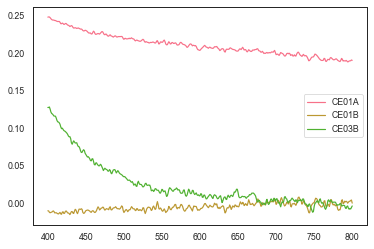

In [111]:
# Inspect Bleached
plt.plot(df_bin['CE01A'], label='CE01A')
plt.plot(df_bin['CE01B'], label='CE01B')
plt.plot(df_bin['CE03B'], label='CE03B')
plt.legend()
plt.show()

In [112]:
# Seems that CE01A was an erroneous measurement, store mean of bleached only
cca_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)
col_names_d = ['CE02','CE03','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']

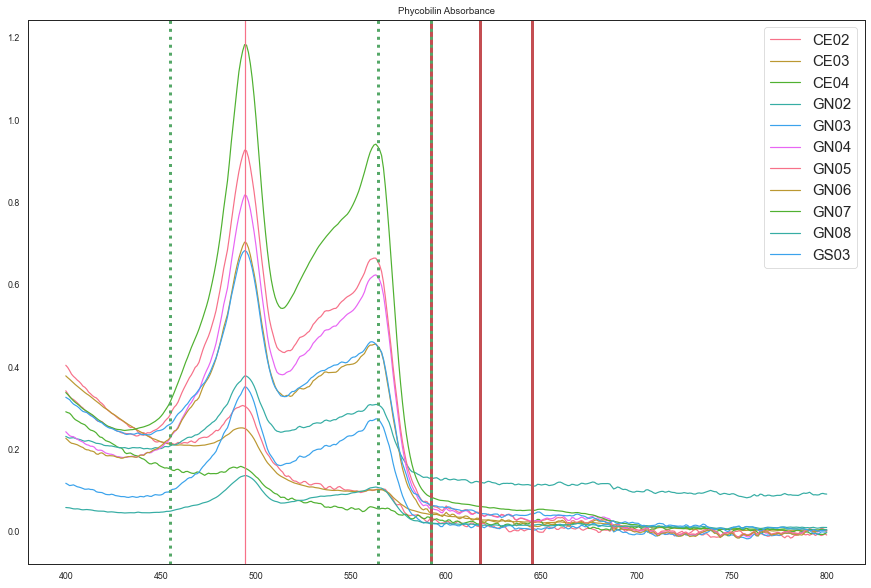

In [113]:
# Figure
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin_d, label=col_names_d)
plt.title('Phycobilin Absorbance')
plt.legend(fontsize=15)

plt.axvline(564,**kwargs) # Phycoerythrin
plt.axvline(455,**kwargs)
plt.axvline(618,**kwargs2) # Phycocyanin
plt.axvline(645,**kwargs2)
plt.axvline(592,**kwargs2)
plt.axvline(592,**kwargs)

plt.axvline(494)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


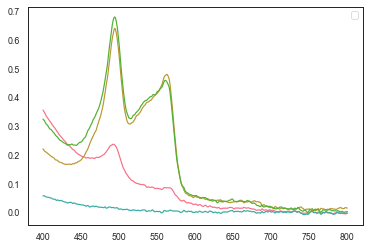

In [114]:
# Mean and std of all sites
cca_phycob = df_bin_d.mean(axis=1)
phycob_pstd = df_bin_d.mean(axis=1) + df_bin_d.std(axis=1)
phycob_nstd = df_bin_d.mean(axis=1) - df_bin_d.std(axis=1)

# Mean per site
CE = ['CE02','CE03','CE04']
GN = ['GN02','GN03','GN04','GN05','GN06','GN07','GN08']
GS =['GS03']

CE_phycob = df_bin_d[CE].mean(axis=1)
GN_phycob = df_bin_d[GN].mean(axis=1)
GS_phycob = df_bin_d[GS]

plt.plot(CE_phycob)
plt.plot(GN_phycob)
plt.plot(GS_phycob)
#plt.fill_between(df_bin.index, phycob_pstd, phycob_nstd, color='C0', alpha=0.5)
plt.plot(cca_bleached)
plt.legend()

In [115]:
# Phycoerythrin concentration (mg/ml)
a564 = df_bin.loc[df_bin.index == 564.0] # Get position
#a564 = a564['Absorbance [A]'].values # Get A values
a592 = df_bin.loc[df_bin.index == 592.0]
#a592 = a592['Absorbance [A]'].values
a455 = df_bin.loc[df_bin.index == 455.0]
#a455 = a455['Absorbance [A]'].values
# Applying PE formula
pe_conc = ((a564.values - a592.values) - (a455.values - a592.values) * 0.2) * 0.12
#print('Phycoerythrin (mg/ml)', pe_conc)

# Phycocyanin concentration (mg/ml)
a618 = df_bin.loc[df_bin.index == 618.0] # Get position
#a618 = a618['Absorbance [A]'].values # Get A values
a645 = df_bin.loc[df_bin.index == 645.0]
#a645 = a645['Absorbance [A]'].values
a592 = df_bin.loc[df_bin.index == 592.0]
#a592 = a592['Absorbance [A]'].values

# Applying PC formula
pc_conc = ((a618.values - a645.values) - (a592.values - a645.values) * 0.51) * 0.15
#print('Phycocyanin (mg/ml)', pc_conc)

# Kursar et al. formulas 
a494 = df_bin.loc[df_bin.index == 494.0] # Modified to the peak obtained in our measeruments from 498 to 494
#a494 = a494['Absorbance [A]'].values
a614 = df_bin.loc[df_bin.index == 614.0]
#a614 = a614['Absorbance [A]'].values
a651 = df_bin.loc[df_bin.index == 651.0]
#a651 = a651['Absorbance [A]'].values

# Apply Kursar et al. formulas
k_apc_conc = (181.3 * a651.values) - (22.3 * a614.values)
k_pc_conc = (151.1 * a614.values) - (99.1 * a651.values)
k_pe_conc = (155.8 * a494.values) - (40.0 * a614.values) - (10.5 * a651.values)

# Sampath-Wiley & Neefus (2006) - Formulas
a564 = a564 # Used in Paine equation
a618 = a618 # Used in Paine equation
a730 = df_bin.loc[df_bin.index == 730.0]
#a730 = a730['Absorbance [A]'].values

# Apply Sampath-Wiley & Neefus formulas
s_pc_conc = 0.154 * (a618.values - a730.values)
s_pe_conc = 0.1247* ((a564.values - a730.values) - 0.4583 * (a618.values - a730.values))

# Build Dataframe
df_concentrations = pd.DataFrame({'PE':pe_conc[0], 'PC':pc_conc[0],
                                         'K_APC':k_apc_conc[0], 'K_PC':k_pc_conc[0],
                                         'K_PE':k_pe_conc[0], 'S_PC':s_pc_conc[0],
                                         'S_PE':s_pe_conc[0]})

In [116]:
df_concentrations

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE
0,0.000060,-0.000055,32.361438,11.064655,24.143856,0.001058,0.001337
1,-0.000049,0.000198,-0.776963,-0.114557,-1.056065,-0.001736,-0.001048
2,0.004148,-0.000719,-0.730408,3.188434,46.608816,0.001599,0.011784
3,0.003146,-0.000575,3.133166,2.432481,37.575977,0.003742,0.010768
4,-0.000759,-0.000606,1.318236,0.774676,5.715088,0.000894,0.001146
5,0.000132,-0.000903,2.637792,1.941331,22.879648,0.001914,0.005045
6,0.019624,-0.000023,17.968139,6.641886,52.887878,0.004492,0.025406
7,0.028644,0.000230,0.984888,0.911324,54.193791,0.003500,0.033964
8,0.063476,0.000417,4.358205,3.393676,125.317736,0.007876,0.075174
9,0.066021,0.000158,3.979972,3.688768,142.312250,0.007626,0.079746


#### Chlorophyll

In [117]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Chlorophylls")
csv_list = list(files_path.glob('*.csv'))
csv_chl = csv_list

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


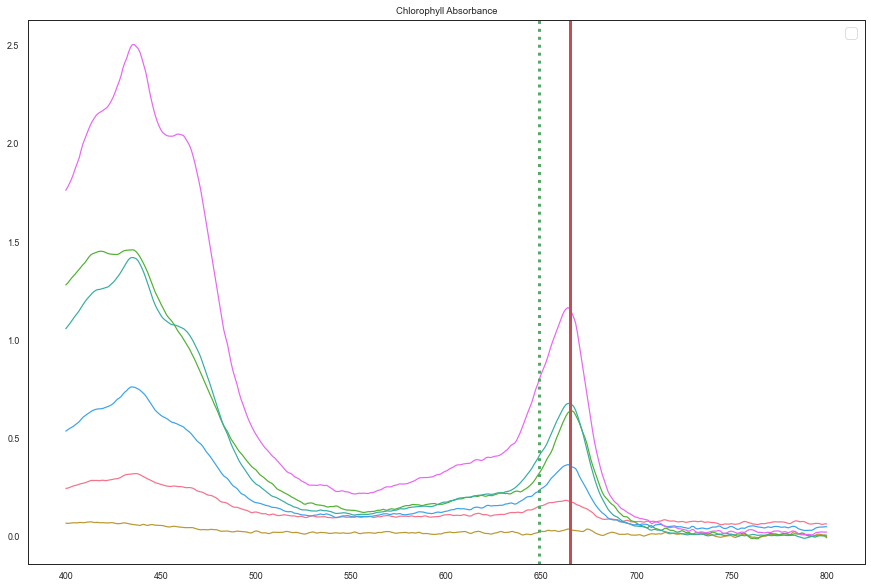

In [118]:
samples_id = []
samples = []

#Chlorophyll
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 400 - 800 nm wavelengths

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin[['CE01A','CE01B','CE02','CE03','CE03B','CE04']]) # Cape Evans
#plt.plot(df_bin[['GN02','GN03','GN04','GN05','GN06','GN07','GN08']]) # Granite Harbour North
#plt.plot(df_bin['GS03']) # Granite Harbour South
#plt.plot(df_bin, label=col_names)
plt.title('Chlorophyll Absorbance')
plt.legend(fontsize=15)

plt.axvline(649,**kwargs) # Chlorophyll
plt.axvline(665,**kwargs2)

plt.show()

In [119]:
cca_chl_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)

cca_chl = df_bin_d.mean(axis=1)

CE_chl = df_bin_d[CE].mean(axis=1)
GN_chl = df_bin_d[GN].mean(axis=1)
GS_chl = df_bin_d[GS]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


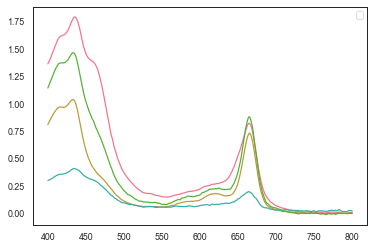

In [120]:
plt.plot(CE_chl)
plt.plot(GN_chl)
plt.plot(GS_chl)
#plt.fill_between(df_bin.index, phycob_pstd, phycob_nstd, color='C0', alpha=0.5)
plt.plot(cca_chl_bleached)
#plt.plot(cca_chl)
plt.legend()

In [121]:
# Chlorophyll concentration (mg)
a665 = df_bin.loc[df_bin.index == 665.0] # Get position
a649 = df_bin.loc[df_bin.index == 649.0]

# Applying formula
chl_conc = ((13.7 * a665.values)-(5.76 * a649.values))
#print('Chlorophyll (mg/ml)', pc_conc)
# Build Dataframe
df_concentrations['Chl'] = chl_conc[0]

df_concentrations.head()

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,Chl
0,0.000060,-0.000055,32.361438,11.064655,24.143856,0.001058,0.001337,1.514997
1,-0.000049,0.000198,-0.776963,-0.114557,-1.056065,-0.001736,-0.001048,0.334363
2,0.004148,-0.000719,-0.730408,3.188434,46.608816,0.001599,0.011784,6.865503
3,0.003146,-0.000575,3.133166,2.432481,37.575977,0.003742,0.010768,6.862322
4,-0.000759,-0.000606,1.318236,0.774676,5.715088,0.000894,0.001146,3.590715


## Pheophytin

In [122]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Pheophytin")
csv_list = list(files_path.glob(r'*.csv'))
csv_pheo = csv_list # Used for plots

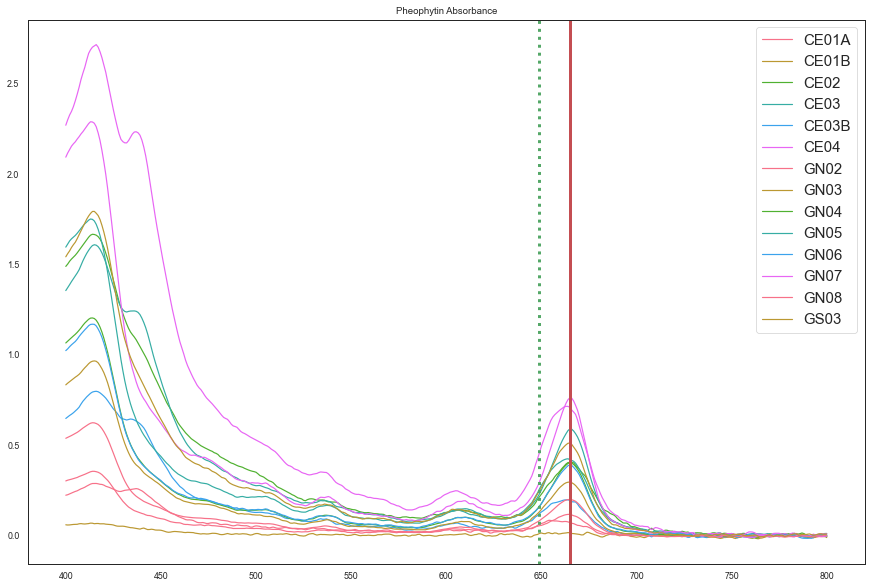

In [123]:
samples_id = []
samples = []

#Chlorophyll
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 400 - 800 nm wavelengths

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin, label=col_names)
plt.title('Pheophytin Absorbance')
plt.legend(fontsize=15)

plt.axvline(649,**kwargs) # Chlorophyll
plt.axvline(665,**kwargs2)

plt.show()

In [124]:
cca_pheo_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)
cca_pheo = df_bin.mean(axis=1)

In [125]:
# Chlorophyll concentration (mg/ml)
a665 = df_bin.loc[df_bin.index == 665.0] # Get position
a649 = df_bin.loc[df_bin.index == 649.0]

# Applying formula - Same as chl
pheo_conc = ((13.7 * a665.values)-(5.76 * a649.values))
#print('Chlorophyll (mg/ml)', pc_conc)
# Build Dataframe
df_concentrations['Pheo'] = pheo_conc[0]

df_concentrations.head()

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,Chl,Pheo
0,0.000060,-0.000055,32.361438,11.064655,24.143856,0.001058,0.001337,1.514997,0.605256
1,-0.000049,0.000198,-0.776963,-0.114557,-1.056065,-0.001736,-0.001048,0.334363,0.119528
2,0.004148,-0.000719,-0.730408,3.188434,46.608816,0.001599,0.011784,6.865503,4.293529
3,0.003146,-0.000575,3.133166,2.432481,37.575977,0.003742,0.010768,6.862322,4.254229
4,-0.000759,-0.000606,1.318236,0.774676,5.715088,0.000894,0.001146,3.590715,1.945285


In [126]:
#Adjust Chlorophyll values
df_concentrations['Chl'] = df_concentrations['Chl'] - df_concentrations['Pheo']

## Prepare final dataframe

In [127]:
# Change values below 0 - This means Absorbance from that pigment was undetectable
df_concentrations[df_concentrations < 0] = 0

# Transpose
df_concentrations = df_concentrations.T

# Set column names
df_concentrations.columns = col_names

In [128]:
df_concentrations

,CE01A,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE,0.000060,0.000000,0.004148,0.003146,0.000000,0.000132,0.019624,0.028644,0.063476,0.066021,0.044212,0.096608,0.009669,0.041408
PC,0.000000,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000417,0.000158,0.000057,0.000000,0.000000,0.000000
K_APC,32.361438,0.000000,0.000000,3.133166,1.318236,2.637792,17.968139,0.984888,4.358205,3.979972,2.301396,8.365172,2.340745,6.145325
K_PC,11.064655,0.000000,3.188434,2.432481,0.774676,1.941331,6.641886,0.911324,3.393676,3.688768,2.535689,4.229743,1.153273,3.745780
K_PE,24.143856,0.000000,46.608816,37.575977,5.715088,22.879648,52.887878,54.193791,125.317736,142.312250,108.211602,181.119622,20.245342,103.786666
S_PC,0.001058,0.000000,0.001599,0.003742,0.000894,0.001914,0.004492,0.003500,0.007876,0.007626,0.006080,0.007974,0.000630,0.004568
S_PE,0.001337,0.000000,0.011784,0.010768,0.001146,0.005045,0.025406,0.033964,0.075174,0.079746,0.055224,0.112534,0.011687,0.052463
Chl,0.909741,0.214835,2.571975,2.608093,1.645430,4.204009,1.971409,2.877107,3.575339,4.929251,3.276427,7.178791,4.842560,4.458936
Pheo,0.605256,0.119528,4.293529,4.254229,1.945285,7.055485,2.241980,3.278945,4.569875,6.738328,4.420832,8.722993,1.273587,5.572993


In [129]:
# Concat weights
#weights = df_weights.groupby(np.arange(len(df_weights)) // 2).mean()
#weights = weights.T
#weights.columns = col_names

#df_samples = pd.concat([df_concentrations,weights], axis=0)

In [130]:
# Concat area [cm2]
df_samples = pd.concat([df_concentrations, df_area.T], axis = 0)

In [131]:
df_samples = df_samples.T
df_samples

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,Chl,Pheo,Area (m2)
CE01A,0.000060,0.000000,32.361438,11.064655,24.143856,0.001058,0.001337,0.909741,0.605256,0.000198
CE01B,0.000000,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.214835,0.119528,0.000242
CE02,0.004148,0.000000,0.000000,3.188434,46.608816,0.001599,0.011784,2.571975,4.293529,0.000697
CE03,0.003146,0.000000,3.133166,2.432481,37.575977,0.003742,0.010768,2.608093,4.254229,0.000531
CE03B,0.000000,0.000000,1.318236,0.774676,5.715088,0.000894,0.001146,1.645430,1.945285,0.000337
CE04,0.000132,0.000000,2.637792,1.941331,22.879648,0.001914,0.005045,4.204009,7.055485,0.000260
GN02,0.019624,0.000000,17.968139,6.641886,52.887878,0.004492,0.025406,1.971409,2.241980,0.001020
GN03,0.028644,0.000230,0.984888,0.911324,54.193791,0.003500,0.033964,2.877107,3.278945,0.001889
GN04,0.063476,0.000417,4.358205,3.393676,125.317736,0.007876,0.075174,3.575339,4.569875,0.001884
GN05,0.066021,0.000158,3.979972,3.688768,142.312250,0.007626,0.079746,4.929251,6.738328,0.002026


In [132]:
# WRONG
# Dilution factor - 3 ml and convert weight to micrograms
#df_samples['PE (mg/ml)'] = (df_samples['PE'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['PC (mg/ml)'] = (df_samples['PC'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['Chl (mg/ml)'] = (df_samples['Chl'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['Pheo (mg/ml)'] = (df_samples['Pheo'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['K_APC (mg/ml)'] = (df_samples['K_APC'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['K_PC (mg/ml)'] = (df_samples['K_PC'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['K_PE (mg/ml)'] = (df_samples['K_PE'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['S_PC (mg/ml)'] = (df_samples['S_PC'].values * 3) / (df_samples['Weight (gr)'].values * 1000)
#df_samples['S_PE (mg/ml)'] = (df_samples['S_PE'].values * 3) / (df_samples['Weight (gr)'].values * 1000)

In [133]:
# NO Dilution factor or weight considered - Focus on [mg/cm2]
df_samples['PE (mg/mm2)'] = (df_samples['PE'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['PC (mg/mm2)'] = (df_samples['PC'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['Chl (mg/mm2)'] = (df_samples['Chl'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['Pheo (mg/mm2)'] = (df_samples['Pheo'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_APC (mg/mm2)'] = (df_samples['K_APC'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_PC (mg/mm2)'] = (df_samples['K_PC'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_PE (mg/mm2)'] = (df_samples['K_PE'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['S_PC (mg/mm2)'] = (df_samples['S_PC'].values) / (df_samples['Area (m2)'].values * 1000)
df_samples['S_PE (mg/mm2)'] = (df_samples['S_PE'].values) / (df_samples['Area (m2)'].values * 1000)

In [134]:
df_samples

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,Chl,Pheo,Area (m2),PE (mg/mm2),PC (mg/mm2),Chl (mg/mm2),Pheo (mg/mm2),K_APC (mg/mm2),K_PC (mg/mm2),K_PE (mg/mm2),S_PC (mg/mm2),S_PE (mg/mm2)
CE01A,0.000060,0.000000,32.361438,11.064655,24.143856,0.001058,0.001337,0.909741,0.605256,0.000198,0.000303,0.000000,4.594650,3.056849,163.441606,55.882094,121.938668,0.005346,0.006750
CE01B,0.000000,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.214835,0.119528,0.000242,0.000000,0.000820,0.887749,0.493918,0.000000,0.000000,0.000000,0.000000,0.000000
CE02,0.004148,0.000000,0.000000,3.188434,46.608816,0.001599,0.011784,2.571975,4.293529,0.000697,0.005951,0.000000,3.690064,6.160013,0.000000,4.574510,66.870611,0.002294,0.016907
CE03,0.003146,0.000000,3.133166,2.432481,37.575977,0.003742,0.010768,2.608093,4.254229,0.000531,0.005924,0.000000,4.911662,8.011731,5.900500,4.580943,70.764552,0.007047,0.020279
CE03B,0.000000,0.000000,1.318236,0.774676,5.715088,0.000894,0.001146,1.645430,1.945285,0.000337,0.000000,0.000000,4.882581,5.772359,3.911680,2.298742,16.958717,0.002654,0.003402
CE04,0.000132,0.000000,2.637792,1.941331,22.879648,0.001914,0.005045,4.204009,7.055485,0.000260,0.000507,0.000000,16.169264,27.136483,10.145354,7.466658,87.998646,0.007361,0.019403
GN02,0.019624,0.000000,17.968139,6.641886,52.887878,0.004492,0.025406,1.971409,2.241980,0.001020,0.019239,0.000000,1.932754,2.198020,17.615823,6.511653,51.850860,0.004404,0.024908
GN03,0.028644,0.000230,0.984888,0.911324,54.193791,0.003500,0.033964,2.877107,3.278945,0.001889,0.015164,0.000122,1.523085,1.735810,0.521381,0.482437,28.689143,0.001853,0.017980
GN04,0.063476,0.000417,4.358205,3.393676,125.317736,0.007876,0.075174,3.575339,4.569875,0.001884,0.033692,0.000222,1.897738,2.425624,2.313272,1.801314,66.516845,0.004181,0.039901
GN05,0.066021,0.000158,3.979972,3.688768,142.312250,0.007626,0.079746,4.929251,6.738328,0.002026,0.032587,0.000078,2.432997,3.325927,1.964448,1.820715,70.242966,0.003764,0.039361


In [135]:
# Inspect the data we are using
print(df_samples['PE (mg/mm2)'][3])
print(type(df_samples['PE (mg/mm2)'][3]))

0.00592379661016949
<class 'numpy.float64'>


In [136]:
df_samples

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,Chl,Pheo,Area (m2),PE (mg/mm2),PC (mg/mm2),Chl (mg/mm2),Pheo (mg/mm2),K_APC (mg/mm2),K_PC (mg/mm2),K_PE (mg/mm2),S_PC (mg/mm2),S_PE (mg/mm2)
CE01A,0.000060,0.000000,32.361438,11.064655,24.143856,0.001058,0.001337,0.909741,0.605256,0.000198,0.000303,0.000000,4.594650,3.056849,163.441606,55.882094,121.938668,0.005346,0.006750
CE01B,0.000000,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.214835,0.119528,0.000242,0.000000,0.000820,0.887749,0.493918,0.000000,0.000000,0.000000,0.000000,0.000000
CE02,0.004148,0.000000,0.000000,3.188434,46.608816,0.001599,0.011784,2.571975,4.293529,0.000697,0.005951,0.000000,3.690064,6.160013,0.000000,4.574510,66.870611,0.002294,0.016907
CE03,0.003146,0.000000,3.133166,2.432481,37.575977,0.003742,0.010768,2.608093,4.254229,0.000531,0.005924,0.000000,4.911662,8.011731,5.900500,4.580943,70.764552,0.007047,0.020279
CE03B,0.000000,0.000000,1.318236,0.774676,5.715088,0.000894,0.001146,1.645430,1.945285,0.000337,0.000000,0.000000,4.882581,5.772359,3.911680,2.298742,16.958717,0.002654,0.003402
CE04,0.000132,0.000000,2.637792,1.941331,22.879648,0.001914,0.005045,4.204009,7.055485,0.000260,0.000507,0.000000,16.169264,27.136483,10.145354,7.466658,87.998646,0.007361,0.019403
GN02,0.019624,0.000000,17.968139,6.641886,52.887878,0.004492,0.025406,1.971409,2.241980,0.001020,0.019239,0.000000,1.932754,2.198020,17.615823,6.511653,51.850860,0.004404,0.024908
GN03,0.028644,0.000230,0.984888,0.911324,54.193791,0.003500,0.033964,2.877107,3.278945,0.001889,0.015164,0.000122,1.523085,1.735810,0.521381,0.482437,28.689143,0.001853,0.017980
GN04,0.063476,0.000417,4.358205,3.393676,125.317736,0.007876,0.075174,3.575339,4.569875,0.001884,0.033692,0.000222,1.897738,2.425624,2.313272,1.801314,66.516845,0.004181,0.039901
GN05,0.066021,0.000158,3.979972,3.688768,142.312250,0.007626,0.079746,4.929251,6.738328,0.002026,0.032587,0.000078,2.432997,3.325927,1.964448,1.820715,70.242966,0.003764,0.039361


In [137]:
df_export = df_samples.filter(['PE (mg/mm2)', 'PC (mg/mm2)', 'Chl (mg/mm2)','Pheo (mg/mm2)',
                               'K_APC (mg/mm2)','K_PC (mg/mm2)','K_PE (mg/mm2)',
                              'S_PC (mg/mm2)','S_PE (mg/mm2)'], axis=1)
df_export = df_export.T

## Export CSV - Pigment [mg/mm2]

In [139]:
# Export pigment concentrations
# df_export.to_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\pigment-mg-mm.csv", 
#                  float_format='%f')

## Plot

In [95]:
out_p = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry"

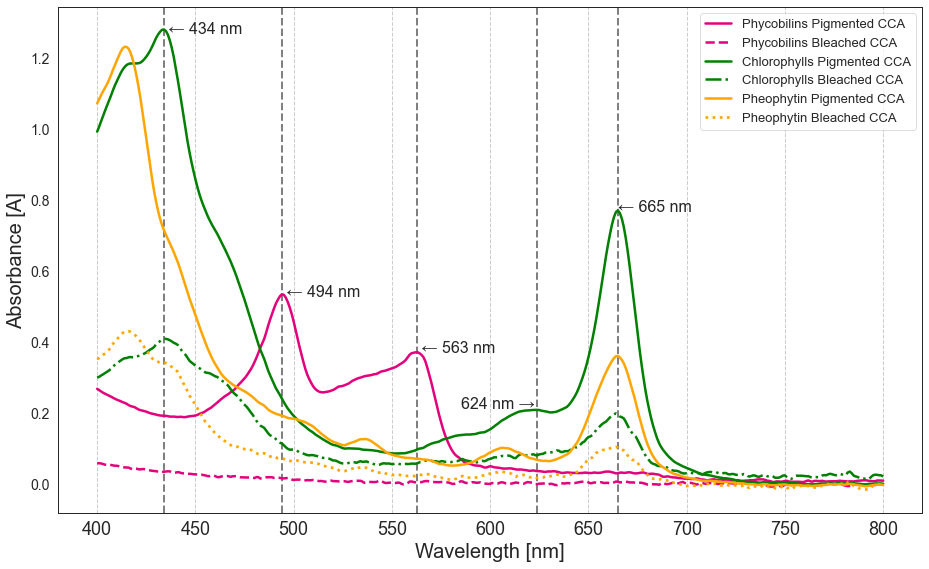

In [173]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
sns.set_style('white')
sns.set_context("paper")
sns.set_palette('husl')

# [A] peaks
plt.axvline(434, linestyle='--', lw=2, color='grey')
plt.axvline(494, linestyle='--', lw=2, color='grey')
plt.axvline(563, linestyle='--', lw=2, color='grey')
plt.axvline(624, linestyle='--', lw=2, color='grey')
plt.axvline(665, linestyle='--', lw=2, color='grey')

plt.plot(cca_phycob, label='Phycobilins Pigmented CCA', linestyle='-', lw=2.5, color='#e4007c')
plt.plot(cca_bleached, label='Phycobilins Bleached CCA', linestyle='--', lw=2.5, color='#e4007c')

plt.plot(cca_chl, label='Chlorophylls Pigmented CCA', linestyle='-', lw=2.5, color='green')
plt.plot(cca_chl_bleached, label='Chlorophylls Bleached CCA', linestyle='-.', lw=2.5, color='green')

plt.plot(cca_pheo, label='Pheophytin Pigmented CCA', linestyle='-', lw=2.5, color='orange')
plt.plot(cca_pheo_bleached, label='Pheophytin Bleached CCA', linestyle=':', lw=2.7, color='orange')

plt.xlabel('Wavelength [nm]', fontdict={'fontsize':20})
plt.ylabel('Absorbance [A]', fontdict={'fontsize':20})
plt.legend(prop={'size': 13})
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)

plt.text(434, 1.27, " ← 434 nm", fontdict={'fontsize':16})
plt.text(494, 0.53, " ← 494 nm", fontdict={'fontsize':16})
plt.text(563, 0.37, " ← 563 nm", fontdict={'fontsize':16})
plt.text(585, 0.213, "624 nm →", fontdict={'fontsize':16})
plt.text(665, 0.768, "← 665 nm", fontdict={'fontsize':16})

plt.grid(axis='x', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig(out_p + '\Absorbance.png', dpi=600)
plt.show()

In [ ]:
ss.find_peaks(cca_chl, height=0.2)

In [ ]:
cca_chl.index[265]

## DONE

### Plotting

In [ ]:
# Phycobilins
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_phycobilins):
    #print(csv_list[i])
    df = pd.read_csv(csv_phycobilins[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_phycobilins[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_phycobilins[i].stem[0:7], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Phycobilin extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')

ax.axvline(564,**kwargs) # Phycoerythrin
ax.axvline(455,**kwargs)
ax.axvline(618,**kwargs2) # Phycocyanin
ax.axvline(645,**kwargs2)
ax.axvline(592,**kwargs2)
ax.axvline(592,**kwargs)
plt.show()

In [ ]:
# Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Phycobillins")
csv_list = list(files_path.glob('*.csv'))
csv_phycobilins = csv_list # Later used for plots
df_weights = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_weights.csv", index_col=0)
df_area = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_area.csv", index_col=0)

# Sample names
col_names = ['CE01A','CE01B','CE02','CE03','CE03B','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']

df_samples = pd.DataFrame(columns=col_names)

samples_id = []
samples = []

#Phycobilins
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Cleaning dataframe
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    #df_bin = df_bin.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    
    samples.append(df[label])
    samples_id.append(label)


samples_df = pd.concat(samples, axis=1, ignore_index=True)
samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names
samples_df.index


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin = df_bin.loc[380:800] # Only 380 - 800 nm wavelengths

df_bin.plot()

In [ ]:
samples_df

In [ ]:


fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df_sample_replicate, label=col_names)
plt.legend()

ax.axvline(564,**kwargs) # Phycoerythrin
ax.axvline(455,**kwargs)
ax.axvline(618,**kwargs2) # Phycocyanin
ax.axvline(645,**kwargs2)
ax.axvline(592,**kwargs2)
ax.axvline(592,**kwargs)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

#df_sample_replicate['CE01A'].plot()
#df_sample_replicate['CE01B'].plot()
#df_sample_replicate['GN07'].plot()
#df_sample_replicate['GS03'].plot()

target = ss.savgol_filter(df_sample_replicate['GN07'], 40, 7, deriv = 4)
plt.plot(target)
plt.legend(fontsize=30)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

df_sample_replicate['CE01A'].plot()
df_sample_replicate['CE01B'].plot()
df_sample_replicate['GN07'].plot()
df_sample_replicate['GS03'].plot()
plt.legend(fontsize=30)
plt.show()

In [ ]:
# Chlorophyll
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_chl):
    #print(csv_list[i])
    df = pd.read_csv(csv_chl[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_chl[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_chl[i].stem[0:7], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Chlorophyll extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')
ax.axvline(649,**kwargs) # Chlorophyll
ax.axvline(665,**kwargs2)
plt.show()

In [ ]:
# Pheophytin
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_pheo):
    #print(csv_list[i])
    df = pd.read_csv(csv_pheo[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_pheo[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_pheo[i].stem[0:8], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Pheophytin extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')
ax.axvline(649,**kwargs) # Chlorophyll
ax.axvline(665,**kwargs2)
plt.show()

### Formula development

In [ ]:
# Phycoerythrin concentration (mg/ml)
a564 = df_bin.loc[df_bin['Wavelength [nm]'] == 564.0] # Get position
a564 = a564['Absorbance [A]'].values # Get A values
a592 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a592 = a592['Absorbance [A]'].values
a455 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a455 = a455['Absorbance [A]'].values

# Applying formula
pe_conc = ((a564 - a592) - (a455 - a592) * 0.2) * 0.12
print('Phycoerythrin (mg/ml)', pe_conc)

In [ ]:
# Phycocyanin concentration (mg/ml)
a618 = df_bin.loc[df_bin['Wavelength [nm]'] == 564.0] # Get position
a618 = a618['Absorbance [A]'].values # Get A values
a645 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a645 = a645['Absorbance [A]'].values
a592 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a592 = a592['Absorbance [A]'].values

# Applying formula
pc_conc = ((a618 - a645) - (a592 - a645) * 0.51) * 0.15
print('Phycocyanin (mg/ml)', pc_conc)

## Other methods and studies looking into Absorbance
### Vasquez-Elizondo et al. 2017
- Pigment extraction and spectrophotometry. I suppose no weight reported.
- Used equations from Kursar et al. 1983 and Lichtenthaler and Wellburn (1983) for Phycobilins and Chlorophyll, respectively:
    - $Allophycocyanin \ (mg/ml) = 181.3 \ A_{651} - 22.3 \ A_{614} $ <br>
    - $Phycocyanin \ (mg/ ml) = 151.1 \ A_{614} - 99.1 \ A_{651} $ <br>
    - $Phycoerythrin \ (mg/ml) = 155.8 \ A_{498.5} - 40.0 \ A_{614} - 10.5 \ A_{651} $
- Next topic: *Reflectance* spectroscopy $R$ normalized to reflectance of bleached thalli.
- Determined light transmition (Absorbance, $D$) by placing thalli fragments against cuvette wall filled with filter seawater.
- Bleached coralline samples were used to subtract non-photosynthetic absorption.
    - Look for samples low in Phycobillins and low in Chlorophyll.
- Used an Absorbance formula to quantify efficiency of light collection, based on $D$ and pigment $mg/m^2$.
### Burdett et al. 2014
- Used reflectance spectroscopy $R$ values. Percentage of $A$ was calculated on the difference between sample absorbance and a white standard 100% $R$. 
- Absorption peaks of Rhodophyta pigments were obtained from Hedley & Mumby (2002).
- Just observed that absorption peaks matched the ones reported in the literature.
#### Main absorption peaks of Rhodophyta photosynthetic pigments from Hedley & Mumby (2002)
Not that this is from spectroscopy measurements
- Chlorophyll a:
    - chla = 435; chla2 = 670; chla3 = 680
- Carotenoids:
    - calpha1 = 423; calpha2 = 444; calpha3 = 473; calpha4 = 500
- Xantophylls:
    - zxn1 = 428; zxn2 = 450; zxn3 = 478 # Zeaxanthin
    - ltn1 = 422; ltn2 = 445; ltn3 = 474 # Lutein
- Phycobilins:
    - pcn = 618 # Phycocyanin
    - pe1 = 490; pe2 = 546; pe3 = 576 # Phycoerythrin
    - apcn = 654 # Allophycocyanin

In [ ]:
# Allophycocyanin (APC)
apc_1 = df_bin.loc[df_bin['Wavelength [nm]'] == 651.0]
apc_2 = df_bin.loc[df_bin['Wavelength [nm]'] == 614.0]
print(apc_1, apc_2)

In [ ]:
c = (181.3 * apc_1['Absorbance [A]'].values) - (22.3 * apc_2['Absorbance [A]'].values)
print(c)

## Photosynthetic pigment quantification via Paine protocol
Outputs:
- Same plot but with vertical lines with different colors of the equations used.
- Dataframe with values
### Chlorophyll

$ Chlorophyll (mg/ml) = (13.7 x A_{665}) - (5.76 x A_{649}) $

In [ ]:
print(df.loc[df['Wavelength [nm]'] == 670])

In [ ]:
df = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\UVVIS-Chlorophylls_test\blank_test.csv", engine='python', header=76, sep='\t')
df = df.drop(labels='Unnamed: 2', axis=1)